# Applying Inferential Statistics

### Hypotheses to test (formed during storytelling):
1. Null: Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Null: Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Null: Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Null: Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [3]:
file_1 = pd.read_csv('Churn_Modelling_Wrangled.csv')

In [4]:
df = pd.DataFrame(file_1)

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [6]:
df_0 = df[df.Exited == 0]
df_1 = df[df.Exited == 1]

## Hypothesis 1: Age

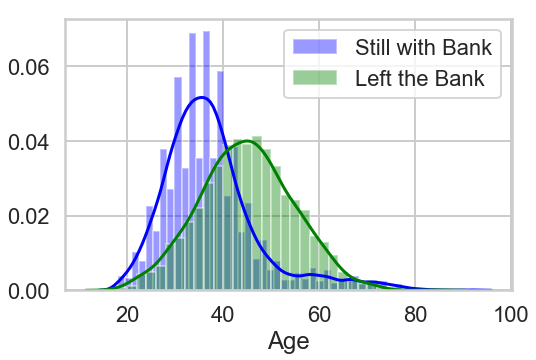

In [7]:
sns.distplot(df_0.Age, color='blue', label='Still with Bank')
sns.distplot(df_1.Age, color='green', label='Left the Bank')
plt.legend()

In [8]:
df_0.Age.mean() , df_0.Age.std()

(37.40720743345053, 10.124618626642905)

In [9]:
df_1.Age.mean() , df_1.Age.std()

(44.83202357563851, 9.762601056689382)

In [10]:
t_1,p_1 = scipy.stats.ttest_ind(df_0.Age, df_1.Age, equal_var=False)
t_1, p_1

(-30.39207948526838, 9.331556303773341e-179)

### Using Bootstrapping

In [11]:
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data))
        bs_s[i] = func(bs_abc)
    return bs_s

In [12]:
diff_means = np.mean(df_1.Age) - np.mean(df_0.Age)
mean_age = np.mean(df.Age)
age_shifted_0 = df_0.Age + mean_age - np.mean(df_0.Age)
age_shifted_1 = df_1.Age + mean_age - np.mean(df_1.Age)

In [13]:
bs_n_0 = bs_choice(age_shifted_0, np.std, 10000)
bs_n_1 = bs_choice(age_shifted_1, np.std, 10000)
bs_mean = bs_n_1 - bs_n_0

In [14]:
p = np.sum(bs_mean >= diff_means) / len(bs_mean)
p

0.0

### Conclusion
We reject Null hypothesis. The probability of null hypothesis is almost zero which is less than significance level of 0.05.

## Hypothesis 2: Credit Score

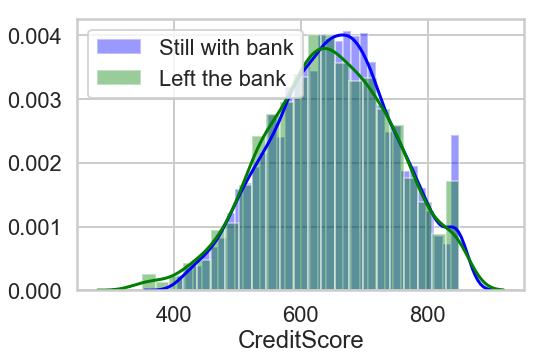

In [15]:
sns.distplot(df_0.CreditScore, color='blue', label='Still with bank')
sns.distplot(df_1.CreditScore, color='green', label='Left the bank')
plt.legend()

In [16]:
t_2,p_2 = scipy.stats.ttest_ind(df_0.CreditScore, df_1.CreditScore, equal_var=False)
t_2, p_2

(2.6329554132353983, 0.00850728939824722)

### Conclusion
We reject Null hypothesis. The probability of null hypothesis is 0.0085 or 0.85 % which is less than significance level of 0.05.

## Hypothesis 3: Balance

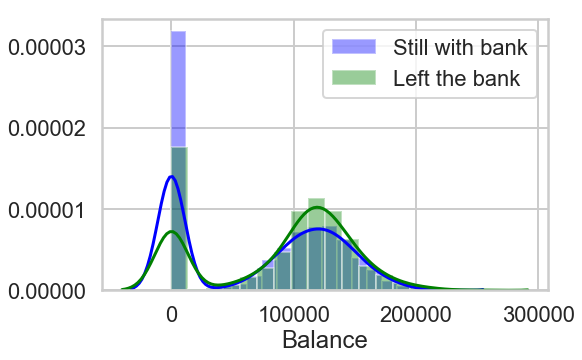

In [17]:
sns.distplot(df_0.Balance, color='blue', label='Still with bank')
sns.distplot(df_1.Balance, color='green', label='Left the bank')
plt.legend()

In [18]:
t_3,p_3 = scipy.stats.ttest_ind(df_0.Balance, df_1.Balance, equal_var=False)
t_3, p_3

(-12.487953651046007, 5.174870353936786e-35)

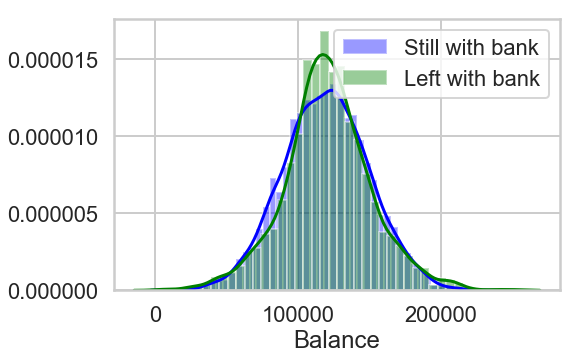

In [19]:
sns.distplot(df_0[df_0.Balance != 0].Balance, color='blue', label='Still with bank')
sns.distplot(df_1[df_1.Balance != 0].Balance, color='green', label='Left with bank')
plt.legend()

In [20]:
t_3,p_3 = scipy.stats.ttest_ind(df_0[df_0.Balance != 0].Balance, df_1[df_1.Balance != 0].Balance, equal_var=False)
t_3, p_3

(-1.3089804395850928, 0.19065943340101865)

### Conclusion
The Balances of Zero are too many in the data. When we consider all the data, we reject Null Hypothesis.
When we only remove the Balances which are Zero, the probability of null hypothesis becomes 19.06% which is significant. Then we reject Alternative Hypothesis.

## Hypothesis 4: Estimated Salary

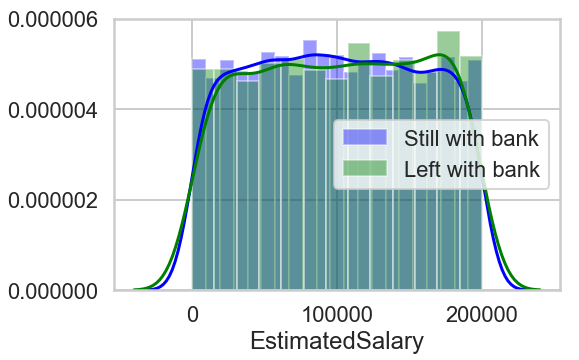

In [21]:
sns.distplot(df_0.EstimatedSalary, color='blue', label='Still with bank')
sns.distplot(df_1.EstimatedSalary, color='green', label='Left with bank')
plt.legend()

In [22]:
t_3,p_3 = scipy.stats.ttest_ind(df_0.EstimatedSalary, df_1.EstimatedSalary, equal_var=False)
t_3, p_3

(-1.171142874685847, 0.24163035341650982)

### Using Bootstrapping

In [23]:
diff_means = np.mean(df_1.EstimatedSalary) - np.mean(df_0.EstimatedSalary)
mean_salary = np.mean(df.EstimatedSalary)
salary_shifted_0 = df_0.EstimatedSalary + mean_salary - np.mean(df_0.EstimatedSalary)
salary_shifted_1 = df_1.EstimatedSalary + mean_salary - np.mean(df_1.EstimatedSalary)

In [24]:
bs_n_0 = bs_choice(salary_shifted_0, np.mean, 10000)
bs_n_1 = bs_choice(salary_shifted_1, np.mean, 10000)
bs_mean = bs_n_1 - bs_n_0

In [25]:
p = np.sum(bs_mean >= diff_means) / len(bs_mean)
p

0.1164

### Conclusion
We do not reject Null hypothesis. The probability of null hypothesis using t-test is 0.2416 or 24.16% and using bootstrapping is 0.1222 or 12.22% which is more than significance level of 0.05.

## Final Conclusion
The variables CreditScore and Age will be most helpful in predicting churning. The variable Balance will also be helpful only in cases where Balance is zero.
